## Identifying Healthcare Professionals (HCP) and their specialization

### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from user_agents import parse
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score

### Load the train and test data

In [2]:
train_df = pd.read_csv("Doceree-HCP_Train.csv")
test_df = pd.read_csv("Doceree-HCP_Test.csv")

In [3]:
train_df.head()

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,TAXONOMY,IS_HCP
0,1001,Desktop,2,170.173.0.22,6974dcaa-f932-480e-9fb5-c52e20e1393a,Portland,97206.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0.0
1,1002,Desktop,2,65.216.253.25,c12f3f8f-8fcf-484a-90e1-1ac04db8cdcf,Arlington,22202.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/deci...,Bone Marrow|Radiography|Chronic|Oncology|Psych...,NaN,0.0
2,1003,Desktop,2,66.232.79.22,a698de4b-e200-46dd-b5fb-40402175ae18,New Meadows,83654.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0.0
3,1004,Desktop,3,137.54.125.246,45967533-75c8-4fbd-a00c-e6ff20447aaa,NaN,229114624.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://globalrph.com/medcalcs/warfarin-mainte...,Dental|Total|Clinical|Pharmacology|Physicians|...,2084P0800X,1.0
4,1005,Mobile,7,174.202.231.99,a17e25be-532d-4cf5-b916-9308c8c3961f,Houston,77008.0,Mozilla/5.0 (iPhone; CPU iPhone OS 16_1_1 like...,Online Medical Journal,Website,https://www.cureus.com/articles/58184-a-review...,Critical Care|Emergency Medicine|General Pract...,NaN,0.0


In [4]:
test_df.head()

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS
0,115501,Desktop,2,75.189.231.103,0d5041ff-f0b6-4d1a-9ad7-0a29f7d485b4,Fayetteville,28305.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6...,Online Medical Journal,Website,https://www.clinicaladvisor.com/home/features/...,Family Practice|Drainage|Clinical|Dermatology|...
1,115502,Mobile,2,24.101.33.158,c8396dd0-969f-4d99-a40b-b7bb1f516154,Conneaut Lake,16316.0,Mozilla/5.0 (iPhone; CPU iPhone OS 15_6_1 like...,Online Medical Journal,Website,https://www.ophthalmologyadvisor.com/topics/ca...,General|Clinical|Operative|Medicine|Cardiology...
2,115503,Desktop,2,172.118.216.142,3c97a081-6518-43f8-9f26-369759cfb471,Covina,91724.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.psychiatryadvisor.com/author/tori-...,Abortion|Anxiety Disorders|Apnea|False|Trauma|...
3,115504,Desktop,7,71.105.120.171,3e2578c8-f794-41af-a38c-c5cfb3c0f014,Brooklyn,11226.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cureus.com/articles/105482-diverti...,Health|Male|Neurological Surgery|Otolaryngolog...
4,115505,Desktop,2,73.82.211.73,ec2ae7ce-6a8c-4156-98a7-07203e60f483,Marietta,30062.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://www.renalandurologynews.com/home/confe...,chronic kidney disease|pain|nephrology|disease...


#### Analyze the data

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               113937 non-null  int64  
 1   DEVICETYPE       113937 non-null  object 
 2   PLATFORM_ID      113937 non-null  int64  
 3   BIDREQUESTIP     113937 non-null  object 
 4   USERPLATFORMUID  113933 non-null  object 
 5   USERCITY         107578 non-null  object 
 6   USERZIPCODE      109345 non-null  float64
 7   USERAGENT        113935 non-null  object 
 8   PLATFORMTYPE     113937 non-null  object 
 9   CHANNELTYPE      113937 non-null  object 
 10  URL              113937 non-null  object 
 11  KEYWORDS         113937 non-null  object 
 12  TAXONOMY         32313 non-null   object 
 13  IS_HCP           113936 non-null  float64
dtypes: float64(2), int64(2), object(10)
memory usage: 12.2+ MB


In [6]:
train_df.describe()

,ID,PLATFORM_ID,USERZIPCODE,IS_HCP
count,113937.000000,113937.000000,1.093450e+05,113936.000000
mean,57969.000000,3.574993,1.830240e+07,0.299993
std,32890.923148,2.569019,1.066908e+08,0.458257
min,1001.000000,1.000000,6.020000e+02,0.000000
25%,29485.000000,2.000000,1.935500e+04,0.000000
50%,57969.000000,2.000000,4.321000e+04,0.000000
75%,86453.000000,6.000000,7.709000e+04,1.000000
max,114937.000000,16.000000,9.970149e+08,1.000000


In [7]:
train_df.dtypes

ID                   int64
DEVICETYPE          object
PLATFORM_ID          int64
BIDREQUESTIP        object
USERPLATFORMUID     object
USERCITY            object
USERZIPCODE        float64
USERAGENT           object
PLATFORMTYPE        object
CHANNELTYPE         object
URL                 object
KEYWORDS            object
TAXONOMY            object
IS_HCP             float64
dtype: object

In [8]:
train_df.shape

(113937, 14)

In [9]:
train_df.columns

Index(['ID', 'DEVICETYPE', 'PLATFORM_ID', 'BIDREQUESTIP', 'USERPLATFORMUID',
       'USERCITY', 'USERZIPCODE', 'USERAGENT', 'PLATFORMTYPE', 'CHANNELTYPE',
       'URL', 'KEYWORDS', 'TAXONOMY', 'IS_HCP'],
      dtype='object')

#### Here the train data set has 113937 rows and 14 columns  

### Checking for null values

In [10]:
missing_values = train_df.isnull().sum()
print(missing_values)

ID                     0
DEVICETYPE             0
PLATFORM_ID            0
BIDREQUESTIP           0
USERPLATFORMUID        4
USERCITY            6359
USERZIPCODE         4592
USERAGENT              2
PLATFORMTYPE           0
CHANNELTYPE            0
URL                    0
KEYWORDS               0
TAXONOMY           81624
IS_HCP                 1
dtype: int64


#### As we observe there are more null values in the usercity and the userzipcode so that we can drop those columns entirely and drop the rows of useragent and userplatformuid and Is_hcp having the null values

### EDA

C:\Users\tejas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


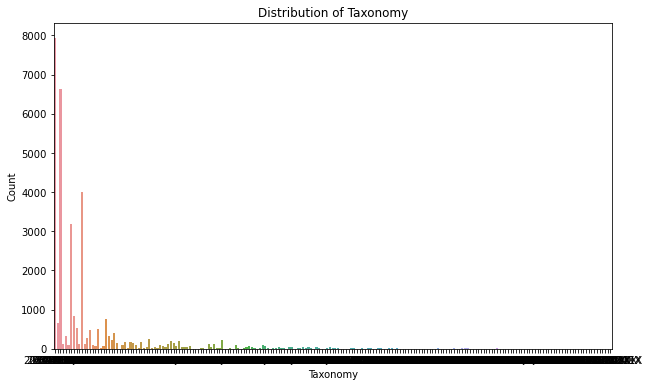

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(train_df['TAXONOMY'])
plt.title('Distribution of Taxonomy')
plt.xlabel('Taxonomy')
plt.ylabel('Count')
plt.show()

In [12]:
hcp_counts = train_df['IS_HCP'].value_counts()
hcp_counts

0.0    79756
1.0    34180
Name: IS_HCP, dtype: int64

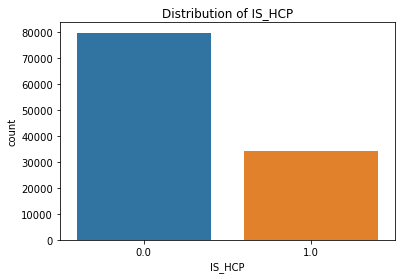

In [13]:
sns.countplot(x='IS_HCP', data=train_df)
plt.title('Distribution of IS_HCP')
plt.show()

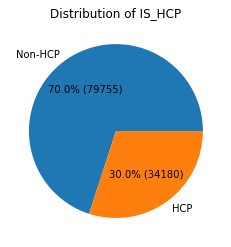

In [14]:
labels = ['Non-HCP', 'HCP']  # Custom labels for the pie chart
plt.pie(hcp_counts, labels=labels, autopct=lambda pct: f'{pct:.1f}% ({int(pct * sum(hcp_counts) / 100)})')
plt.title('Distribution of IS_HCP')
plt.show()

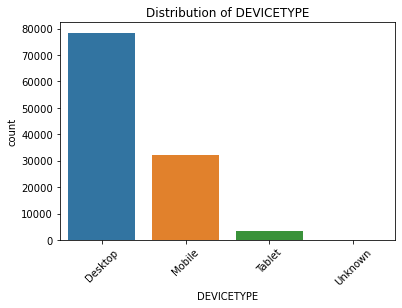

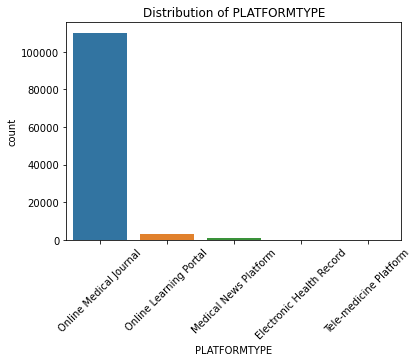

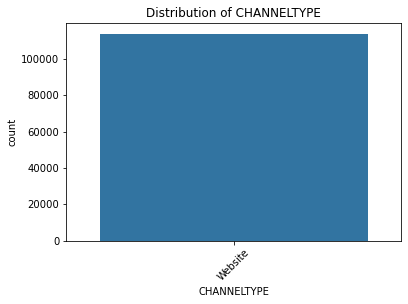

In [15]:
# Check the distribution of categorical variables
categorical_cols = ['DEVICETYPE', 'PLATFORMTYPE','CHANNELTYPE']
for col in categorical_cols:
    sns.countplot(x=col, data=train_df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

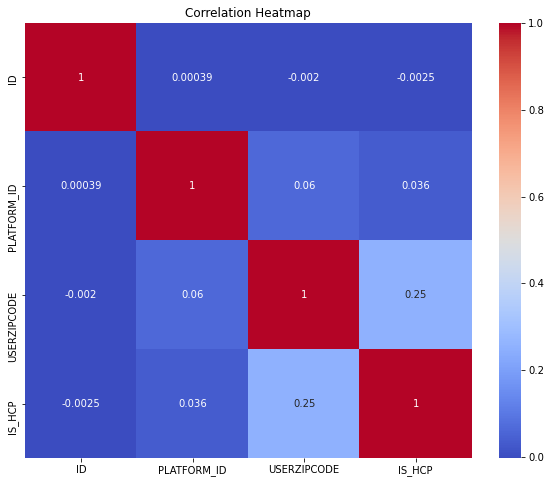

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [17]:
train_df['URL_LENGTH'] = train_df['URL'].apply(lambda x: len(str(x)))
train_df['KEYWORDS_LENGTH'] = train_df['KEYWORDS'].apply(lambda x: len(str(x).split('|')))
test_df['URL_LENGTH'] = test_df['URL'].apply(lambda x: len(str(x)))
test_df['KEYWORDS_LENGTH'] = test_df['KEYWORDS'].apply(lambda x: len(str(x).split('|')))


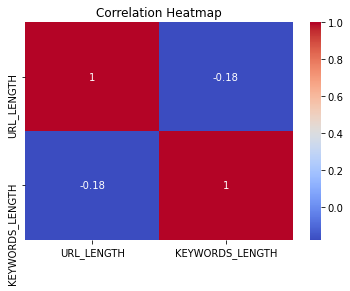

In [18]:
# Check the correlation between numerical features
numerical_cols = ['URL_LENGTH', 'KEYWORDS_LENGTH']
correlation = train_df[numerical_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Preprocessing

In [19]:
train_df = train_df.drop(['USERCITY','USERZIPCODE','ID'],axis = 1)
test_df = test_df.drop(['USERCITY','USERZIPCODE'],axis = 1)


In [20]:
train_df.dropna(subset=['IS_HCP','USERPLATFORMUID','USERAGENT','IS_HCP'], inplace=True)
test_df.dropna(subset=['USERAGENT'], inplace=True)

In [21]:
train_df.head(1)

,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,TAXONOMY,IS_HCP,URL_LENGTH,KEYWORDS_LENGTH
0,Desktop,2,170.173.0.22,6974dcaa-f932-480e-9fb5-c52e20e1393a,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0.0,72,20


In [22]:
ip_segments = train_df['BIDREQUESTIP'].str.split('.', expand=True)
ip_segments_test = test_df['BIDREQUESTIP'].str.split('.', expand=True)
ip_segments.columns = ['IP_segment_1', 'IP_segment_2', 'IP_segment_3', 'IP_segment_4']
ip_segments_test.columns = ['IP_segment_1', 'IP_segment_2', 'IP_segment_3', 'IP_segment_4']

# Convert the IP segments to numeric values
ip_segments = ip_segments.astype(int)
ip_segments_test = ip_segments_test.astype(int)

# Concatenate the IP segments with the original data
train_df = pd.concat([train_df, ip_segments], axis=1)
train_df = train_df.drop('BIDREQUESTIP',axis=1)
test_df = pd.concat([test_df, ip_segments_test], axis=1)
test_df = test_df.drop('BIDREQUESTIP',axis=1)


In [23]:
train_df.head(1)

,DEVICETYPE,PLATFORM_ID,USERPLATFORMUID,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,TAXONOMY,IS_HCP,URL_LENGTH,KEYWORDS_LENGTH,IP_segment_1,IP_segment_2,IP_segment_3,IP_segment_4
0,Desktop,2,6974dcaa-f932-480e-9fb5-c52e20e1393a,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0.0,72,20,170,173,0,22


In [24]:
#Label encoding on USERPLATFORMUID
label_encoder = LabelEncoder()
train_df['USERPLATFORMUID'] = label_encoder.fit_transform(train_df['USERPLATFORMUID'])
test_df['USERPLATFORMUID'] = label_encoder.fit_transform(test_df['USERPLATFORMUID'])


In [25]:
train_df.head(1)

,DEVICETYPE,PLATFORM_ID,USERPLATFORMUID,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,TAXONOMY,IS_HCP,URL_LENGTH,KEYWORDS_LENGTH,IP_segment_1,IP_segment_2,IP_segment_3,IP_segment_4
0,Desktop,2,22183,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0.0,72,20,170,173,0,22


In [26]:

train_df['OperatingSystem'] = train_df['USERAGENT'].apply(lambda x: parse(x).os.family)
train_df['Browser'] = train_df['USERAGENT'].apply(lambda x: parse(x).browser.family)

test_df['OperatingSystem'] = test_df['USERAGENT'].apply(lambda x: parse(x).os.family)
test_df['Browser'] = test_df['USERAGENT'].apply(lambda x: parse(x).browser.family)

In [27]:
train_df = train_df.drop('USERAGENT', axis=1)
test_df = test_df.drop('USERAGENT', axis=1)


In [28]:
train_df.head(1)

,DEVICETYPE,PLATFORM_ID,USERPLATFORMUID,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,TAXONOMY,IS_HCP,URL_LENGTH,KEYWORDS_LENGTH,IP_segment_1,IP_segment_2,IP_segment_3,IP_segment_4,OperatingSystem,Browser
0,Desktop,2,22183,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0.0,72,20,170,173,0,22,Windows,Chrome


In [29]:
train_df['OperatingSystem'] = label_encoder.fit_transform(train_df['OperatingSystem'])
train_df['Browser'] = label_encoder.fit_transform(train_df['Browser'])
train_df['PLATFORMTYPE'] = label_encoder.fit_transform(train_df['PLATFORMTYPE'])

test_df['OperatingSystem'] = label_encoder.fit_transform(test_df['OperatingSystem'])
test_df['Browser'] = label_encoder.fit_transform(test_df['Browser'])
test_df['PLATFORMTYPE'] = label_encoder.fit_transform(test_df['PLATFORMTYPE'])


device_type_encoded = pd.get_dummies(train_df['DEVICETYPE'], prefix='DEVICETYPE')
train_df= pd.concat([train_df, device_type_encoded], axis=1)
train_df= train_df.drop('DEVICETYPE', axis=1)

device_type_encoded1 = pd.get_dummies(test_df['DEVICETYPE'], prefix='DEVICETYPE')
test_df= pd.concat([test_df, device_type_encoded1], axis=1)
test_df= test_df.drop('DEVICETYPE', axis=1)


In [30]:
import re
import tldextract
def clean_url(url):
    # Remove leading/trailing spaces
    url = url.strip()
    
    # Remove protocol and www.
    url = re.sub(r'^https?://(?:www\.)?', '', url)
    
    # Remove query parameters
    url = re.sub(r'\?.*', '', url)
    
    # Remove trailing slashes
    url = url.rstrip('/')
    
    return url

# Apply the cleaning function to the 'URL' column
train_df['URL'] = train_df['URL'].apply(clean_url)
train_df['Domian'] = train_df['URL'].apply(lambda x: tldextract.extract(x).domain)
test_df['URL'] = test_df['URL'].apply(clean_url)
test_df['Domian'] = test_df['URL'].apply(lambda x: tldextract.extract(x).domain)


In [31]:
train_df = train_df.drop('URL',axis = 1)
test_df = test_df.drop('URL',axis = 1)


In [32]:
train_df['Domian'] = label_encoder.fit_transform(train_df['Domian'])
test_df['Domian'] = label_encoder.fit_transform(test_df['Domian'])


In [33]:
train_df.head(1)

,PLATFORM_ID,USERPLATFORMUID,PLATFORMTYPE,CHANNELTYPE,KEYWORDS,TAXONOMY,IS_HCP,URL_LENGTH,KEYWORDS_LENGTH,IP_segment_1,IP_segment_2,IP_segment_3,IP_segment_4,OperatingSystem,Browser,DEVICETYPE_Desktop,DEVICETYPE_Mobile,DEVICETYPE_Tablet,DEVICETYPE_Unknown,Domian
0,2,22183,3,Website,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0.0,72,20,170,173,0,22,7,3,1,0,0,0,2


In [34]:
train_df.isnull().sum()

PLATFORM_ID               0
USERPLATFORMUID           0
PLATFORMTYPE              0
CHANNELTYPE               0
KEYWORDS                  0
TAXONOMY              81621
IS_HCP                    0
URL_LENGTH                0
KEYWORDS_LENGTH           0
IP_segment_1              0
IP_segment_2              0
IP_segment_3              0
IP_segment_4              0
OperatingSystem           0
Browser                   0
DEVICETYPE_Desktop        0
DEVICETYPE_Mobile         0
DEVICETYPE_Tablet         0
DEVICETYPE_Unknown        0
Domian                    0
dtype: int64

In [35]:
train_df['CHANNELTYPE'] = 1
test_df['CHANNELTYPE'] = 1

In [36]:

train_df.head(1)

,PLATFORM_ID,USERPLATFORMUID,PLATFORMTYPE,CHANNELTYPE,KEYWORDS,TAXONOMY,IS_HCP,URL_LENGTH,KEYWORDS_LENGTH,IP_segment_1,IP_segment_2,IP_segment_3,IP_segment_4,OperatingSystem,Browser,DEVICETYPE_Desktop,DEVICETYPE_Mobile,DEVICETYPE_Tablet,DEVICETYPE_Unknown,Domian
0,2,22183,3,1,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0.0,72,20,170,173,0,22,7,3,1,0,0,0,2


In [37]:
train_df['IS_HCP'] = train_df['IS_HCP'].astype(int)

In [38]:
# Handling missing values in 'Taxonomy' based on 'IS_HCP' values
train_df.loc[train_df['IS_HCP'] == 0, 'TAXONOMY'] = train_df.loc[train_df['IS_HCP'] == 0, 'TAXONOMY'].fillna('Unknown')

# Optional: Replace NaN values for HCP with a placeholder if needed
train_df.loc[train_df['IS_HCP'] == 1, 'TAXONOMY'] = train_df.loc[train_df['IS_HCP'] == 1, 'TAXONOMY'].fillna('Not Applicable')

In [39]:
train_df['TAXONOMY'] = label_encoder.fit_transform(train_df['TAXONOMY'])

In [40]:
train_df = train_df.drop('KEYWORDS',axis=1)
test_df = test_df.drop('KEYWORDS',axis=1)

In [41]:
train_df.head(1)


,PLATFORM_ID,USERPLATFORMUID,PLATFORMTYPE,CHANNELTYPE,TAXONOMY,IS_HCP,URL_LENGTH,KEYWORDS_LENGTH,IP_segment_1,IP_segment_2,IP_segment_3,IP_segment_4,OperatingSystem,Browser,DEVICETYPE_Desktop,DEVICETYPE_Mobile,DEVICETYPE_Tablet,DEVICETYPE_Unknown,Domian
0,2,22183,3,1,208,0,72,20,170,173,0,22,7,3,1,0,0,0,2


In [42]:
train_df.columns

Index(['PLATFORM_ID', 'USERPLATFORMUID', 'PLATFORMTYPE', 'CHANNELTYPE',
       'TAXONOMY', 'IS_HCP', 'URL_LENGTH', 'KEYWORDS_LENGTH', 'IP_segment_1',
       'IP_segment_2', 'IP_segment_3', 'IP_segment_4', 'OperatingSystem',
       'Browser', 'DEVICETYPE_Desktop', 'DEVICETYPE_Mobile',
       'DEVICETYPE_Tablet', 'DEVICETYPE_Unknown', 'Domian'],
      dtype='object')

In [43]:
test_df.columns

Index(['ID', 'PLATFORM_ID', 'USERPLATFORMUID', 'PLATFORMTYPE', 'CHANNELTYPE',
       'URL_LENGTH', 'KEYWORDS_LENGTH', 'IP_segment_1', 'IP_segment_2',
       'IP_segment_3', 'IP_segment_4', 'OperatingSystem', 'Browser',
       'DEVICETYPE_Desktop', 'DEVICETYPE_Mobile', 'DEVICETYPE_Tablet',
       'DEVICETYPE_Unknown', 'Domian'],
      dtype='object')

In [44]:
train_df.isnull().sum()

PLATFORM_ID           0
USERPLATFORMUID       0
PLATFORMTYPE          0
CHANNELTYPE           0
TAXONOMY              0
IS_HCP                0
URL_LENGTH            0
KEYWORDS_LENGTH       0
IP_segment_1          0
IP_segment_2          0
IP_segment_3          0
IP_segment_4          0
OperatingSystem       0
Browser               0
DEVICETYPE_Desktop    0
DEVICETYPE_Mobile     0
DEVICETYPE_Tablet     0
DEVICETYPE_Unknown    0
Domian                0
dtype: int64

#### If we observe now there are  no null values in the data

### Model Training

In [45]:
X = train_df.drop(['IS_HCP', 'TAXONOMY'], axis=1)
y_hcp = train_df['IS_HCP']
y_taxonomy = train_df['TAXONOMY']

#### Splitting the dataset

In [46]:
X_train, X_val, y_hcp_train, y_hcp_val, y_taxonomy_train, y_taxonomy_val = train_test_split(X, y_hcp, y_taxonomy, test_size=0.2, random_state=42)

#### RandomForestClassifier

In [47]:
model_hcp = RandomForestClassifier()
model_hcp.fit(X_train, y_hcp_train)

RandomForestClassifier()

In [48]:
# Train the model for taxonomy prediction
model_taxonomy = RandomForestClassifier()
model_taxonomy.fit(X_train, y_taxonomy_train)




RandomForestClassifier()

In [49]:
predictions_hcp = model_hcp.predict(X_val)
predictions_taxonomy = model_taxonomy.predict(X_val)

In [57]:
accuracy_hcp = accuracy_score(y_hcp_val, predictions_hcp)
accuracy_taxonomy = accuracy_score(y_taxonomy_val, predictions_taxonomy)



print('Accuracy for HCP prediction:', accuracy_hcp)
print('Accuracy for taxonomy prediction:', accuracy_taxonomy)


Accuracy for HCP prediction: 0.9858685157552883
Accuracy for taxonomy prediction: 0.911261300798736


In [58]:
accuracy_percentage = accuracy_hcp * 100

# Display the accuracy in percentages
print('Accuracy Percent of HCP is : {:.2f}%'.format(accuracy_percentage))

Accuracy Percent of HCP is : 98.59%


In [59]:
accuracy_percentage = accuracy_taxonomy * 100

# Display the accuracy in percentages
print('Accuracy Percent of Taxonomy is : {:.2f}%'.format(accuracy_percentage))

Accuracy Percent of Taxonomy is : 91.13%


#### Here I used the randomforest classifier model and it is giving the 98% accuracy for the HCP and 91% accuracy for the Taxonomy

### Test_Data

In [60]:
output_data = test_df[['ID']].copy()
output_data1 = test_df[['ID']].copy()

In [61]:
 test_df = test_df.drop('ID',axis=1)

In [62]:
predictions_hcp_test = model_hcp.predict(test_df)
predictions_taxonomy_test = model_taxonomy.predict(test_df)

In [63]:


output_data['IS_HCP'] = predictions_hcp_test

output_data.to_csv('Hcp_predictions.csv', index=False)


In [64]:
# Save predictions to a CSV file


output_data1['IS_HCP'] = predictions_hcp_test
output_data1['TAXONOMY'] = predictions_taxonomy_test


output_data1.to_csv('Taxonomy_predictions.csv', index=False)

In [65]:
 Result  = pd.read_csv('Taxonomy_predictions.csv')

In [66]:
Result['TAXONOMY'] = label_encoder.inverse_transform(Result['TAXONOMY'])

In [67]:
 Result.head(5)

In [68]:
 Result.to_csv('Actual_Taxonomy_predictions.csv', index=False)